In [1]:
using Plots
default(fmt=:png)
using SpecialFunctions
fact(x) = exp(logfactorial(x))
binom(x, k) = exp(logfactorial(x) - logfactorial(k) - logfactorial(x-k))

f(x, m, n=m) = sum(binom(m, k)/binom(m+n, k) * x^k/fact(k) for k in 0:m)
pade_exp(x, m, n=m) = f(x, m, n)/ f(-x, m, n)
taylor_exp(x, m) = sum(x^k/fact(k) for k in 0:m)

taylor_exp (generic function with 1 method)

[ Info: Saved animation to D:\OneDrive\public\0042\pade_exp.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0042\\pade_exp.gif")
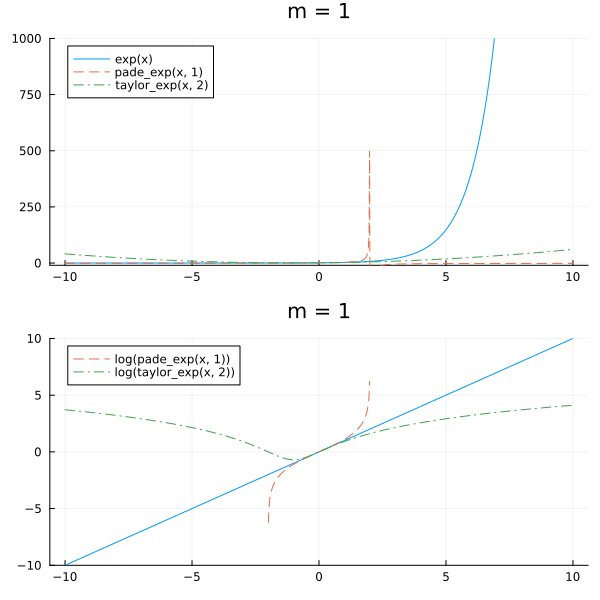

In [2]:
a, b = -10, 10
x = range(a, b, 1000)
safe_log(x) = x ≥ 0 ? log(x) : oftype(x, NaN)

anim = @animate for m in 1:20
    P = plot(x, exp; label="exp(x)", ylim=(-10, 1000))
    plot!(x, x -> pade_exp(x, m); label="pade_exp(x, $m)", ls=:dash)
    plot!(x, x -> taylor_exp(x, 2m); label="taylor_exp(x, $(2m))", ls=:dashdot)
    title!("m = $m")
    
    Q = plot(x, identity; label="", ylim=(a, b))
    plot!(x, x -> safe_log(pade_exp(x, m)); label="log(pade_exp(x, $m))", ls=:dash)
    plot!(x, x -> safe_log(taylor_exp(x, 2m)); label="log(taylor_exp(x, $(2m)))", ls=:dashdot)
    title!("m = $m")
    
    plot(P, Q; size=(600, 600), layout=(2, 1), legend=:topleft)
end

gif(anim, "pade_exp.gif", fps=2)

In [3]:
using SymPy
@vars z

f(z, 3)

                     3        2              
0.00833333333333333*z  + 0.1*z  + 0.5*z + 1.0

In [4]:
pade_exp(z, 1).series(n = 8)

                   2         3          4           5            6            
1.0 + 1.0*z + 0.5*z  + 0.25*z  + 0.125*z  + 0.0625*z  + 0.03125*z  + 0.015625*

 7    / 8\
z  + O\z /

In [5]:
sympy.init_printing(order="rev-lex")
taylor_exp(z, 2)

                   2
1.0 + 1.0*z + 0.5*z 

In [6]:
pade_exp(z, 2).series(n = 8)

                   2                      3                       4           
1.0 + 1.0*z + 0.5*z  + 0.166666666666667*z  + 0.0416666666666666*z  + 0.006944

             5                         6                         7    / 8\
44444444442*z  - 8.13151629364128e-18*z  - 0.000578703703703707*z  + O\z /

In [7]:
sympy.init_printing(order="rev-lex")
taylor_exp(z, 3)

                   2                      3
1.0 + 1.0*z + 0.5*z  + 0.166666666666667*z 

In [8]:
pade_exp(z, 3).series(n = 8)

                                               2                      3       
1.0 + 0.999999999999999*z + 0.499999999999999*z  + 0.166666666666666*z  + 0.04

                4                        5                        6           
16666666666665*z  + 0.00833333333333326*z  + 0.00138888888888887*z  + 0.000208

              7    / 8\
333333333326*z  + O\z /

In [9]:
sympy.init_printing(order="rev-lex")
taylor_exp(z, 6)

                   2                      3                       4           
1.0 + 1.0*z + 0.5*z  + 0.166666666666667*z  + 0.0416666666666667*z  + 0.008333

             5                        6
33333333333*z  + 0.00138888888888889*z 

In [10]:
sympy.init_printing(order="lex")
taylor_exp(z, 6)

                     6                        5                       4       
0.00138888888888889*z  + 0.00833333333333333*z  + 0.0416666666666667*z  + 0.16

               3        2              
6666666666667*z  + 0.5*z  + 1.0*z + 1.0